# Machine Learning | Classification

##### by *Leonardo Damasio* | **Data Scientist**

### Tools

In [1]:
print("\nImporting tools")

# Basic Tools
import pandas as pd # Pandas
import numpy as np # NumPy
import matplotlib.pyplot as plt # MatPlotLib
import operator # Operator
import os # Operating System

# Data Wrangling Tools
from sklearn.model_selection import train_test_split # Train / Test Split
from sklearn.preprocessing import LabelEncoder # Transforms into numerical (Only if you have categorical records)

# Results Tools
from sklearn.metrics import confusion_matrix, accuracy_score # Simple Confusion Matrix and Accuracy Score
from yellowbrick.classifier import ConfusionMatrix # Confusion Matrix Plot
from matplotlib.pylab import rcParams # Plot Size

# Extra Tools
from sklearn.ensemble import ExtraTreesClassifier # Variable Importances

print("Successfully imported tools")


Importing tools
Successfully imported tools


### Classifying Algorithms (Choose One)

In [2]:
random = 0
possible = range(6)
choice = ""

while choice not in possible:

    try:
        choice = int(input("""
Choose the number of your algorithm:

0 for Naive Bayes Classifier
1 for K-Nearest Neighbors Classifier
2 for Decision Tree Classifier
3 for Support Vector Machine Classifier
4 for Random Forest Classifier
5 for Extreme Gradient Boosted Trees Classifier

Choice: """))
    
    except:
        pass
    
    if choice not in possible:
        print("\n\n\nYou must choose one of these numbers: ", list(possible))

if choice == 0:
    print("Naive Bayes Classifier")
    from sklearn.naive_bayes import GaussianNB 
    model = GaussianNB()

elif choice == 1:
    print("K-Nearest Neighbors Classifier")
    from sklearn.neighbors import KNeighborsClassifier 
    model = KNeighborsClassifier(n_neighbors = 3)

elif choice == 2:
    print("Decision Tree Classifier")
    from sklearn.tree import DecisionTreeClassifier 
    model = DecisionTreeClassifier(random_state=random)
    import graphviz # Graph visualization
    from sklearn.tree import export_graphviz # Creates a .dot for a Decision Tree Visualization. To visualize, copy and paste the content inside http://www.webgraphviz.com

elif choice == 3:
    print("Support Vector Machine Classifier")
    from sklearn.svm import SVC 
    model = SVC(probability=True, random_state=random)

elif choice == 4:
    print("Random Forest Classifier")
    from sklearn.ensemble import RandomForestClassifier 
    model = RandomForestClassifier(n_estimators = 1000, random_state=random)

elif choice == 5:
    print("Extreme Gradient Boosted Trees Classifier")
    from xgboost import XGBClassifier 
    model = XGBClassifier(base_score=0.5, 
                           booster='gbtree', 
                           colsample_bylevel=1,
                           colsample_bynode=1,
                           colsample_bytree=0.8,
                           gamma=0,
                           learning_rate=0.2, 
                           max_delta_step=0, 
                           max_depth=5,
                           min_child_weight=1, 
                           missing=None, 
                           n_estimators=1000,
                           n_jobs=1,
                           nthread=None, 
                           objective='binary:logistic', 
                           random_state=random,
                           reg_alpha=0, 
                           reg_lambda=1, 
                           scale_pos_weight=1, 
                           seed=None,
                           silent=None, 
                           subsample=0.8, 
                           verbosity=1)

print("Success")


Choose the number of your algorithm:

0 for Naive Bayes Classifier
1 for K-Nearest Neighbors Classifier
2 for Decision Tree Classifier
3 for Support Vector Machine Classifier
4 for Random Forest Classifier
5 for Extreme Gradient Boosted Trees Classifier

Choice: 4
Random Forest Classifier
Success


### Results Folder

In [3]:
print("\nCreating the results folder")

try:
    os.mkdir('results')
    print ("Successfully created the directory <results>.")
except OSError:
    print ("Directory <results> already exists.")


Creating the results folder
Directory <results> already exists.


### Datasets Import

In [4]:
print("\nImporting dataset")

dataset = pd.read_csv("credit.csv", sep = ",")
print("Dataset imported")
print("Dataset Shape:", dataset.shape)


Importing dataset
Dataset imported
Dataset Shape: (1000, 21)


### X / Y Split

In [5]:
x = dataset.iloc[:,0:20]
x_labels = [i for i in x.columns]
print("\n***** X *****\n")
pd.DataFrame(x).head()


***** X *****



,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,4,'real estate',67,none,own,2,skilled,1,yes,yes
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,2,'real estate',22,none,own,1,skilled,1,none,yes
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,3,'real estate',49,none,own,1,'unskilled resident',2,none,yes
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,4,'life insurance',45,none,'for free',1,skilled,2,none,yes
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,4,'no known property',53,none,'for free',2,skilled,2,none,yes


In [6]:
y = dataset.iloc[:,20]
print("\n***** Y *****\n")
pd.DataFrame(y).head()


***** Y *****



,class
0,good
1,bad
2,good
3,good
4,bad


### Categorical -> Numerical

In [7]:
x = x.values
labelencoder = LabelEncoder()
transform = [0,2,3,5,6,8,9,11,13,14,16,18,19]

for i in transform:
    x[:,i] = labelencoder.fit_transform(x[:,i])
    
x = pd.DataFrame(x)
x.columns = x_labels
print("\nX categorical to numerical\n")
x.head()


X categorical to numerical



,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,2,6,1,7,1169,0,3,4,3,2,4,2,67,1,1,2,3,1,1,1
1,1,48,3,7,5951,3,0,2,0,2,2,2,22,1,1,1,3,1,0,1
2,0,12,1,4,2096,3,1,2,3,2,3,2,49,1,1,1,2,2,0,1
3,2,42,3,5,7882,3,1,2,3,1,4,0,45,1,0,1,3,2,0,1
4,2,24,2,1,4870,3,0,3,3,2,4,1,53,1,0,2,3,2,0,1


### Train / Test Split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random)

# Title
print("\nTrain / Test Split\n")

# X Train
print("X Train:")
print(x_train.shape[0], "records")
print(x_train.shape[1], "predictor/explanatory/independent variables\n")

# Y Train
print("Y Train:")
print(y_train.shape[0], "records")
try:
    print(y_train.shape[1], "predicted/response/dependent variable\n")
except:
    print("1 predicted/response/dependent variable\n")

# X Test
print("X Test:")
print(x_test.shape[0], "records")
print(x_test.shape[1], "predictor/explanatory/independent variables\n")

# Y Test
print("Y Test:")
print(y_test.shape[0], "records")
try:
    print(y_test.shape[1], "predicted/response/dependent variable")
except:
    print("1 predicted/response/dependent variable")


Train / Test Split

X Train:
700 records
20 predictor/explanatory/independent variables

Y Train:
700 records
1 predicted/response/dependent variable

X Test:
300 records
20 predictor/explanatory/independent variables

Y Test:
300 records
1 predicted/response/dependent variable


### Model Fit

In [9]:
if choice == 5: # Only if you are using a XGBClassifier
    x_train = x_train.values
    y_train = y_train.values
    x_test = x_test.values
    y_test = y_test.values

model.fit(x_train, y_train)
print("\nModel Fitted")

if choice == 2: # Only if you are using a Decision Tree Classifier
    export_graphviz(model, out_file = "tree.dot")
    print("<tree.dot> file exported") 


Model Fitted


### Test Prediction

In [10]:
pred_y_test = model.predict(x_test)
print("\nTest Predicted")
print("\nPredictions\n")
pd.DataFrame(pred_y_test).head()


Test Predicted

Predictions



,0
0,bad
1,good
2,good
3,good
4,good


### Test Prediction Probabilities

In [11]:
probability = model.predict_proba(x_test) 
print("\nTest Prediction Probabilities\n")
pd.DataFrame(probability.round(4)).head()


Test Prediction Probabilities



,0,1
0,0.597,0.403
1,0.163,0.837
2,0.081,0.919
3,0.196,0.804
4,0.339,0.661


### Accuracy Score

In [12]:
score = accuracy_score(y_test, pred_y_test)
print("\nAccuracy Score: ", score)


Accuracy Score:  0.78


### Simple Confusion Matrix

In [13]:
matrix = confusion_matrix(y_test, pred_y_test)
print("\nMatrix\n")
pd.DataFrame(matrix)


Matrix



,0,1
0,37,49
1,17,197


### Confusion Matrix Plot

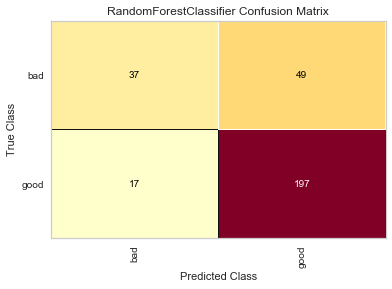


Image <matrix.png> saved.



In [14]:
matrix_plot = ConfusionMatrix(model)
rcParams['figure.figsize'] = 5, 5
matrix_plot.fit(x_train, y_train)
matrix_plot.score(x_test, y_test)
matrix_plot.poof(outpath="results/matrix.png", dpi=300) # Only if you want to save the plot as an image
matrix_plot.poof()

print("\nImage <matrix.png> saved.\n")

### Variables Importances

In [15]:
forest = ExtraTreesClassifier(n_estimators=1000, random_state=random)
forest.fit(x_train, y_train)
importances = forest.feature_importances_

dic = dict(zip(x_labels, importances.round(4)))
sort_values = sorted(dic.items(), key=operator.itemgetter(1), reverse=False)
sorted_importances = pd.DataFrame(sort_values)

print("\nVariables Importances\n")
pd.DataFrame(sorted_importances.values, columns=["Variable", "Importance"])


Variables Importances



,Variable,Importance
0,foreign_worker,0.008
1,num_dependents,0.025
2,other_parties,0.0255
3,own_telephone,0.0319
4,existing_credits,0.0352
5,other_payment_plans,0.0358
6,housing,0.0372
7,job,0.0425
8,personal_status,0.0451
9,savings_status,0.0462


### Variables Importances Plot

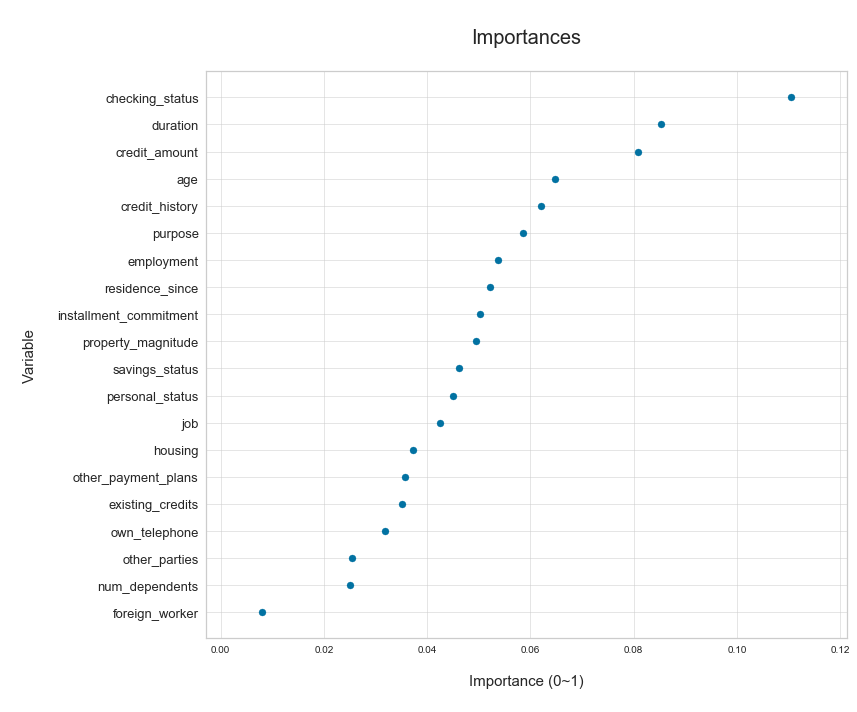


Image <importances.png> saved.



In [16]:
plt.rcParams['figure.figsize'] = 12, 10
plt.scatter(sorted_importances[1], sorted_importances[0])
plt.title('\nImportances\n', fontsize=20)
plt.xlabel('\nImportance (0~1)\n', fontsize=15)
plt.ylabel('\nVariable\n', fontsize=15)
plt.grid(alpha=0.5)
plt.yticks(fontsize=13)
plt.tight_layout()
plt.savefig('results/importances.png', format='png', dpi = 300, bbox_inches='tight') # Only if you want to save the plot as an image
plt.show()

print("\nImage <importances.png> saved.\n")

### Exporting Importances

In [17]:
lista = []

index = 0
for i in x_labels:
    lista.append(str(round(importances[index]*100,2)) + "% | " + str(i))
    index += 1

file = open('results/importances.csv', 'w')

file.write('Importance|Variable\n')

index = 0
while index < len(x_labels):
    file.write(str(lista[index])+'\n')
    index += 1

file.close()

print("\nFile <importances.csv> saved.\n")


File <importances.csv> saved.



### Exporting Predictions

In [18]:
file = open('results/predictions.csv', 'w')

file.write('Key|x_test|y_test|pred_y_test|Probability\n')

index = 0
while index < len(pred_y_test):
    file.write(str(index) + '|' + str(np.array(x_test)[index]) + '|' + str(np.array(y_test)[index]) + '|' + str(np.array(pred_y_test)[index]) + '|' + str(round(probability[index][1], 4)).replace(".", ",") + '\n')
    index += 1

file.close()

print("\nFile <predictions.csv> saved.\n")


File <predictions.csv> saved.



### *Leonardo Damasio* | **Data Scientist**

#### LinkedIn
##### www.linkedin.com/in/leonardodamasio

#### GitHub
##### www.github.com/leonardodamasio/

#### Email
##### leoleonardo1996@hotmail.com